In [19]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [20]:
#load the pickle file
with open('../data/external/combined_augmented_data.pkl','rb') as f:
     X_train,y_train,X_test,y_test = pickle.load(f)

In [23]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (54910, 28, 28)
y_train Shape: (54910,)
X_test Shape: (14344, 28, 28)
y_test Shape: (14344,)


In [24]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter. 

In [25]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(map(int,list(np.unique(y_train))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

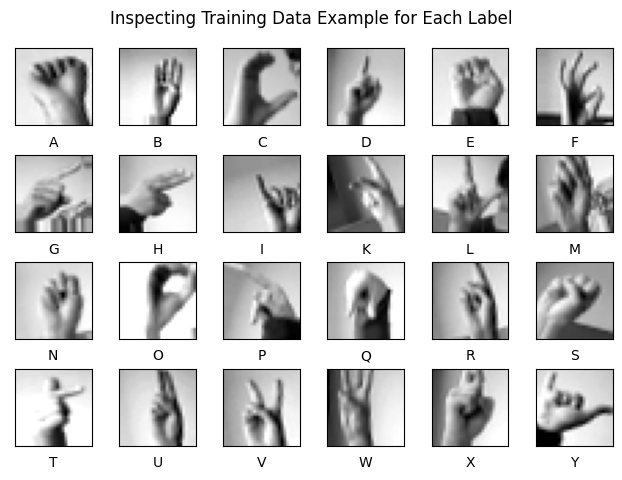

In [26]:
#visualization of dataset 
fig, ax = plt.subplots(4,6)
fig.suptitle('Inspecting Training Data Example for Each Label')
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

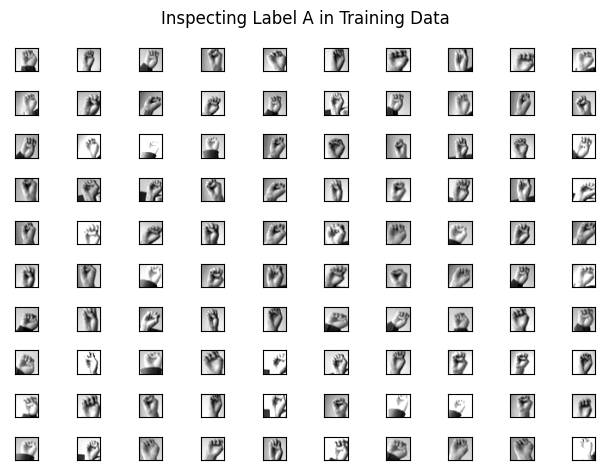

In [41]:
#visualization of dataset 
fig, ax = plt.subplots(10,10)
plt.suptitle('Inspecting Label A in Training Data')
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_train,label)[0]

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

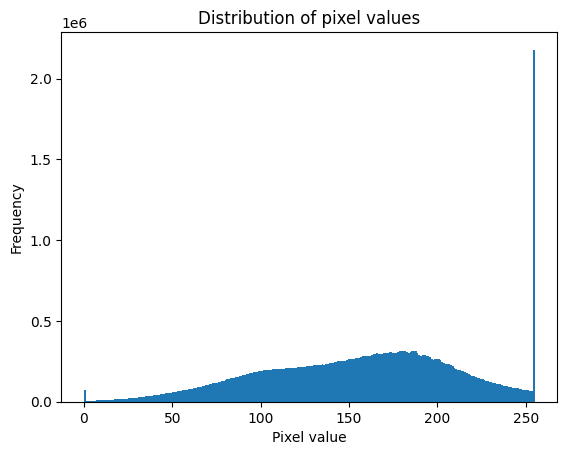

In [42]:
#plot the distribution of pixel values
pixel_values = X_train
plt.hist(pixel_values.flatten(), bins=256)
plt.title("Distribution of pixel values")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

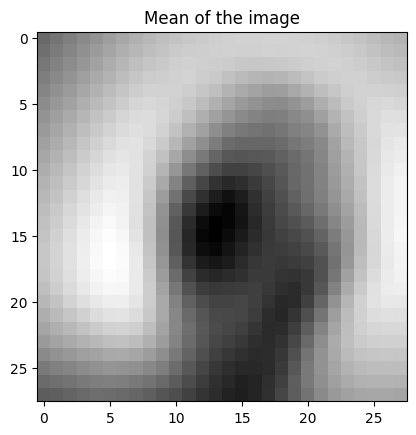

In [43]:
#plot the mean image
mean_image = np.mean(pixel_values, axis=0)
plt.imshow(mean_image.reshape(28,28), cmap='gray')
plt.title("Mean of the image")
plt.show()

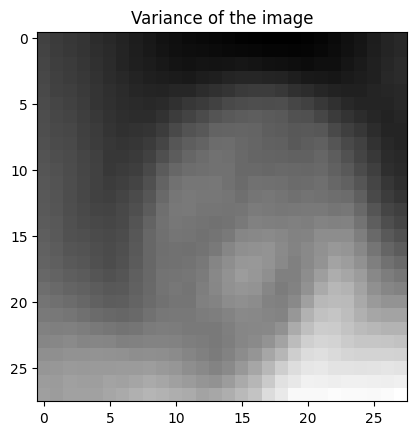

In [44]:
# plot the variance image
var_image = np.var(pixel_values, axis=0)
plt.imshow(var_image.reshape(28,28), cmap='gray')
plt.title("Variance of the image")
plt.show()